In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
from matplotlib.ticker import FuncFormatter

In [30]:
sns.set_style('darkgrid')
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)
sns.set_palette(palette)

## Basic Q-learning
### Cartpole

In [43]:
# Path to your log directory
log_dirs = ['data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_02-05-2025_23-49-38/',
            'data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_03-05-2025_00-34-42/']
learning_rates = [0.001, 0.05]
n_logs = len(log_dirs)
eval_period = 10_000

# Load the events file
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        
        df[scalar_tag] = arr
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    split = log_dir.split('_')
    name = split[3]
    df['name'] = name
    df['lr'] = learning_rates[idx]
    dfs.append(df)


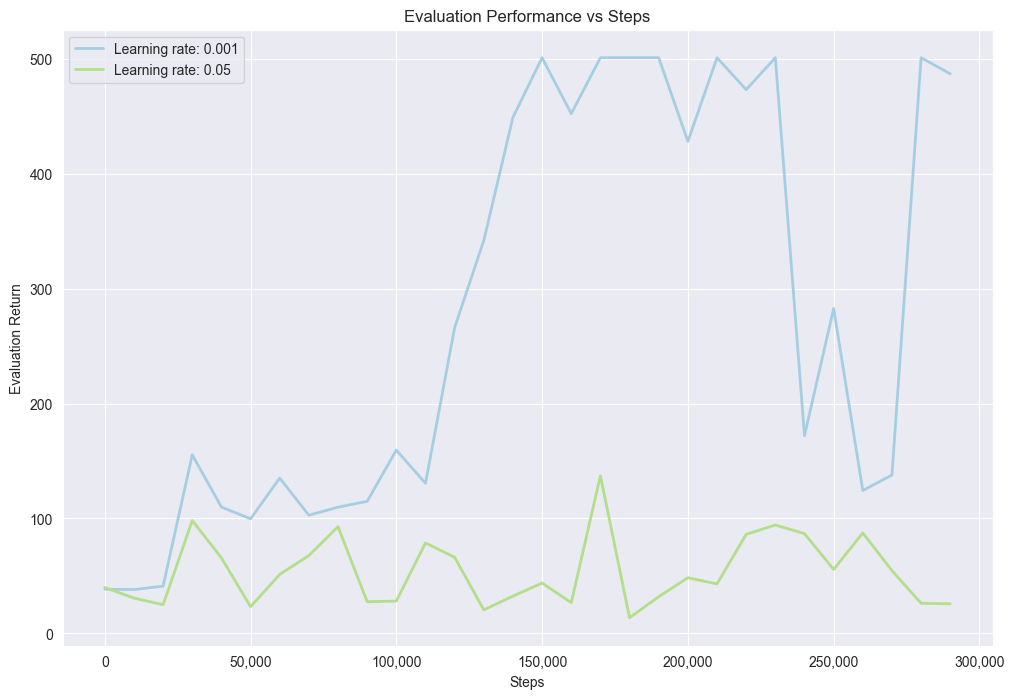

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=f"Learning rate: {df['lr'][0]}")
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/dqn_cartpole_eval.png', dpi=200, pad_inches=0, bbox_inches='tight')

In [46]:
# Path to your log directory
log_dirs = ['data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_02-05-2025_23-49-38/',
            'data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_03-05-2025_00-34-42/']
learning_rates = [0.001, 0.05]
n_logs = len(log_dirs)
eval_period = 1000

# Load the events file
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('critic_loss', 'q_values'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        
        df[scalar_tag] = arr
        df['steps'] = np.arange(len(df['critic_loss'])) * eval_period
    split = log_dir.split('_')
    name = split[3]
    df['name'] = name
    df['lr'] = learning_rates[idx]
    dfs.append(df)


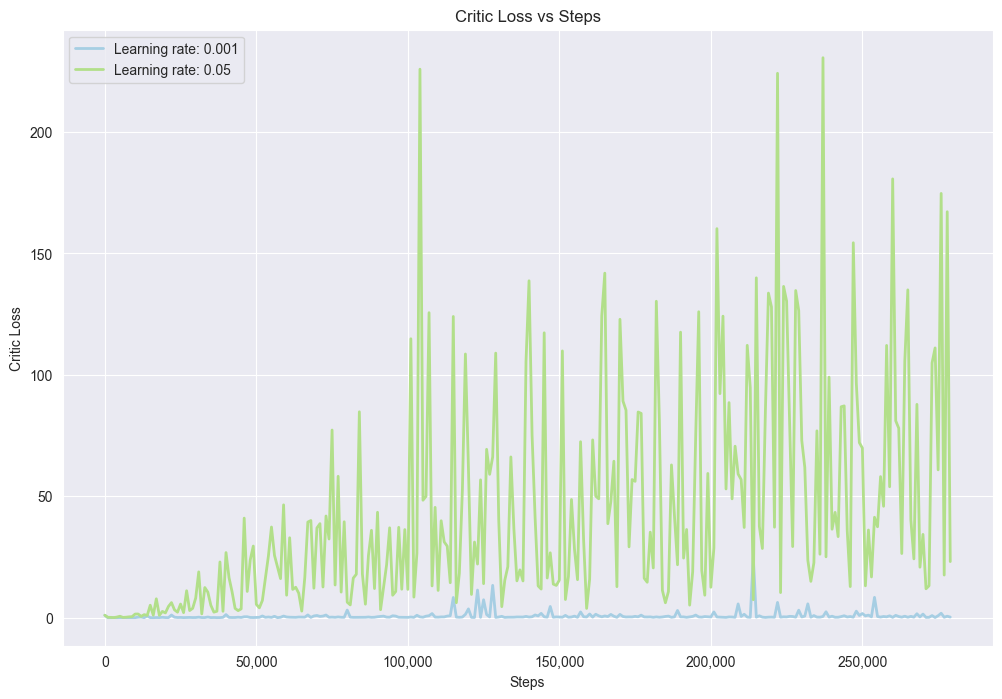

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['critic_loss'], linewidth=2, color=palette[c_idx],
            label=f"Learning rate: {df['lr'][0]}")
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Critic Loss')
ax.set_title('Critic Loss vs Steps')
ax.legend()

plt.savefig('plots/dqn_cartpole_critic_loss.png', dpi=200, pad_inches=0, bbox_inches='tight')

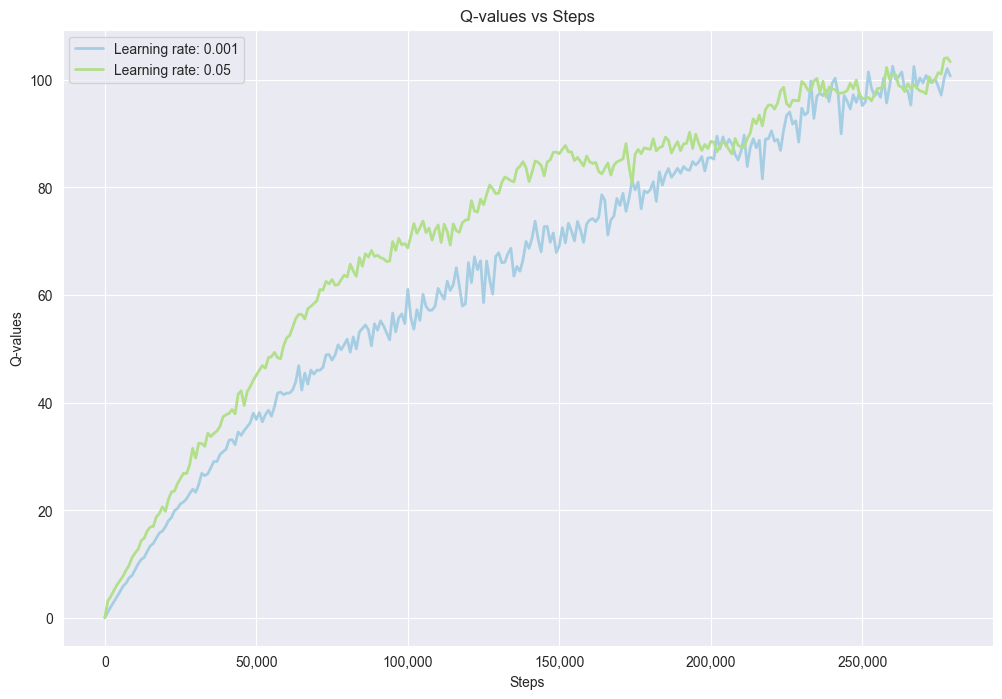

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['q_values'], linewidth=2, color=palette[c_idx],
            label=f"Learning rate: {df['lr'][0]}")
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Q-values')
ax.set_title('Q-values vs Steps')
ax.legend()

plt.savefig('plots/dqn_cartpole_q_values.png', dpi=200, pad_inches=0, bbox_inches='tight')

### LunadLander

In [19]:
# Path to your log directory
log_dirs = ['data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-02-01/',
            'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-09-37/',
            'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-14-06/']
n_logs = len(log_dirs)
eval_period = 10_000

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    split = log_dir.split('_')
    name = split[3]
    df['name'] = name
    dfs.append(df)


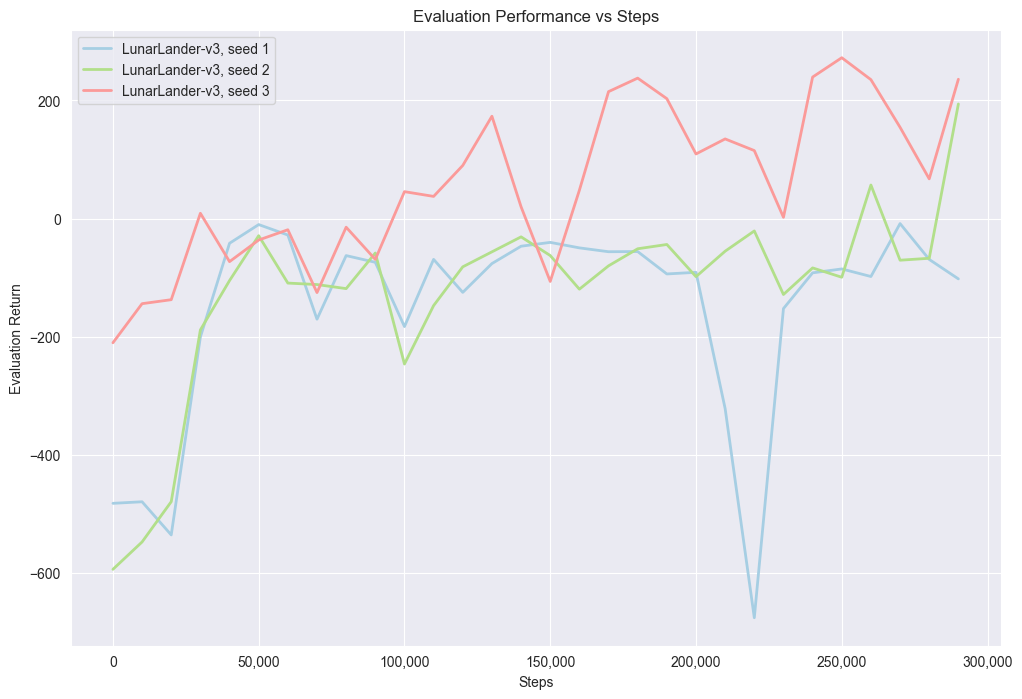

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=f"{df['name'][0]}, seed {i+1}")
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/dqn_lunar_lander.png', dpi=200, pad_inches=0, bbox_inches='tight')

## Double Q-learning

### LunarLander

In [39]:
# Path to your log directory
log_dirs_simple = ['data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-02-01/',
            'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-09-37/',
            'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_03-05-2025_00-14-06/']
n_logs = len(log_dirs_simple)
eval_period = 10_000

# Load the events file
df_simple = pd.DataFrame()
for idx, log_dir in enumerate(log_dirs_simple):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df_simple[f"Simple DQN, seed {idx+1}"] = arr
        df_simple['steps'] = np.arange(len(df_simple[f"Simple DQN, seed {idx+1}"])) * eval_period

df_simple['average_eval'] = df_simple.drop(columns=['steps']).mean(axis=1)

# Path to your log directory
log_dirs_double = ['data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_04-05-2025_11-27-13/',
                'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_05-05-2025_15-24-53/',
                'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_05-05-2025_15-35-25/']
n_logs = len(log_dirs_double)
eval_period = 10_000

# Load the events file
df_double = pd.DataFrame()
for idx, log_dir in enumerate(log_dirs_double):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df_double[f"Double DQN, seed {idx+1}"] = arr
        df_double['steps'] = np.arange(len(df_double[f"Double DQN, seed {idx+1}"])) * eval_period

df_double['average_eval'] = df_double.drop(columns=['steps']).mean(axis=1)

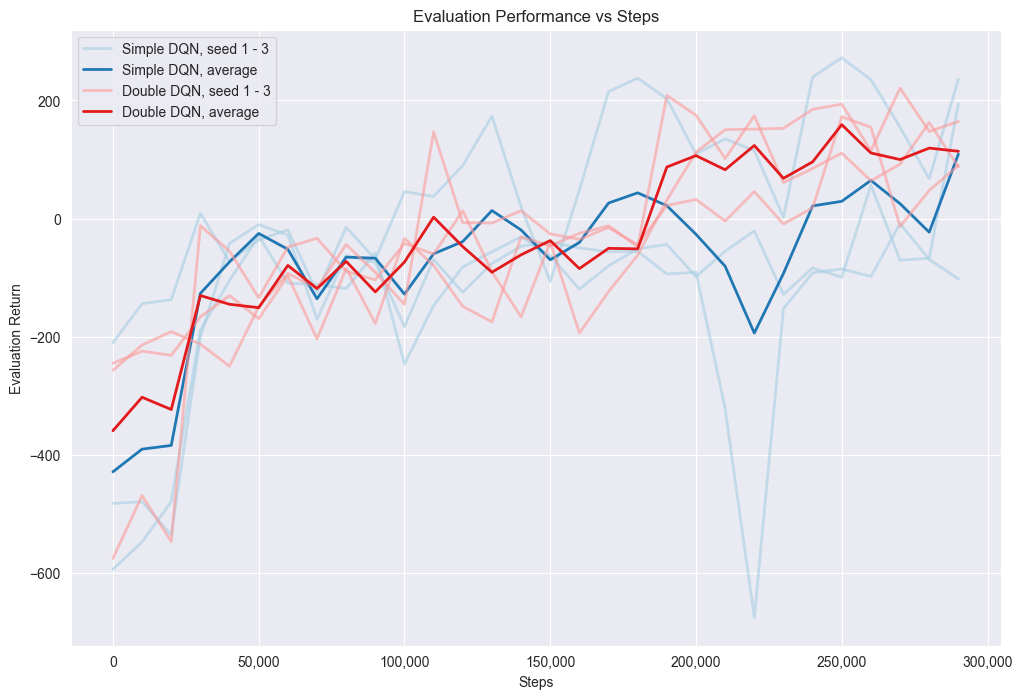

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for idx in range(0, 3):
	if idx == 2:
		ax.plot(df_simple['steps'], df_simple[f"Simple DQN, seed {idx+1}"], linewidth=2, color=palette[c_idx],
			label=f"Simple DQN, seed 1 - 3", alpha=0.6)
	else:
		ax.plot(df_simple['steps'], df_simple[f"Simple DQN, seed {idx+1}"], linewidth=2, color=palette[c_idx],
			alpha=0.6)
c_idx += 1
ax.plot(df_simple['steps'], df_simple['average_eval'], linewidth=2, color=palette[c_idx],
	label=f"Simple DQN, average")

c_idx = 4
for idx in range(0, 3):
	if idx == 2:
		ax.plot(df_double['steps'], df_double[f"Double DQN, seed {idx+1}"], linewidth=2, color=palette[c_idx],
			label=f"Double DQN, seed 1 - 3", alpha=0.6)
	else:
		ax.plot(df_double['steps'], df_double[f"Double DQN, seed {idx+1}"], linewidth=2, color=palette[c_idx],
			alpha=0.6)
c_idx += 1
ax.plot(df_double['steps'], df_double['average_eval'], linewidth=2, color=palette[c_idx],
	label=f"Double DQN, average")

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/double_dqn_lunar_lander.png', dpi=200, pad_inches=0, bbox_inches='tight')

### MsPacman

In [ ]:
# Path to your log directory
log_dir = 'data/hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_04-05-2025_12-56-36/'
eval_period = 10_000
log_period = 1000

# Load the events file
df_eval = pd.DataFrame()
df_train = pd.DataFrame()

ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()  # Load all data

# Access scalar data
for scalar_tag in ea.Tags()['scalars']:
    if scalar_tag not in ('eval_return', 'train_return', 'epsilon'):
        continue
    scalar_events = ea.Scalars(scalar_tag)
    arr = []
    for event in scalar_events:
        arr.append(event.value)
    if scalar_tag in ('eval_return'):
        df_eval['steps'] = np.arange(len(df_eval['eval_return'])) * eval_period
    if scalar_tag == 'train_return':
        df_train[scalar_tag] = arr
        df_train['steps'] = np.arange(len(df_train['train_return'])) * log_period / 1.45
        df_train['rolling_train_8'] = df_train[scalar_tag].rolling(8).mean()
        df_train['rolling_train_16'] = df_train[scalar_tag].rolling(16).mean()
        df_train['rolling_train_32'] = df_train[scalar_tag].rolling(32).mean()

split = log_dir.split('_')
name = split[3]
df_eval['name'] = name + '_eval'
df_train['name'] = name + '_train'
dfs = [df_eval, df_train]


ValueError: Length of values (980) does not match length of index (100)

In [65]:
df_train

,train_return,steps,rolling_train_8,rolling_train_16,rolling_train_32,name
0,200.0,0.000000,NaN,NaN,NaN,MsPacmanNoFrameskip-v0_train
1,130.0,689.655172,NaN,NaN,NaN,MsPacmanNoFrameskip-v0_train
2,190.0,1379.310345,NaN,NaN,NaN,MsPacmanNoFrameskip-v0_train
3,280.0,2068.965517,NaN,NaN,NaN,MsPacmanNoFrameskip-v0_train
4,220.0,2758.620690,NaN,NaN,NaN,MsPacmanNoFrameskip-v0_train
...,...,...,...,...,...,...
1445,2100.0,996551.724138,2200.00,2186.250,1925.6250,MsPacmanNoFrameskip-v0_train
1446,3080.0,997241.379310,2228.75,2213.125,1975.0000,MsPacmanNoFrameskip-v0_train
1447,2800.0,997931.034483,2363.75,2280.625,1994.6875,MsPacmanNoFrameskip-v0_train
1448,2040.0,998620.689655,2376.25,2271.250,2007.1875,MsPacmanNoFrameskip-v0_train


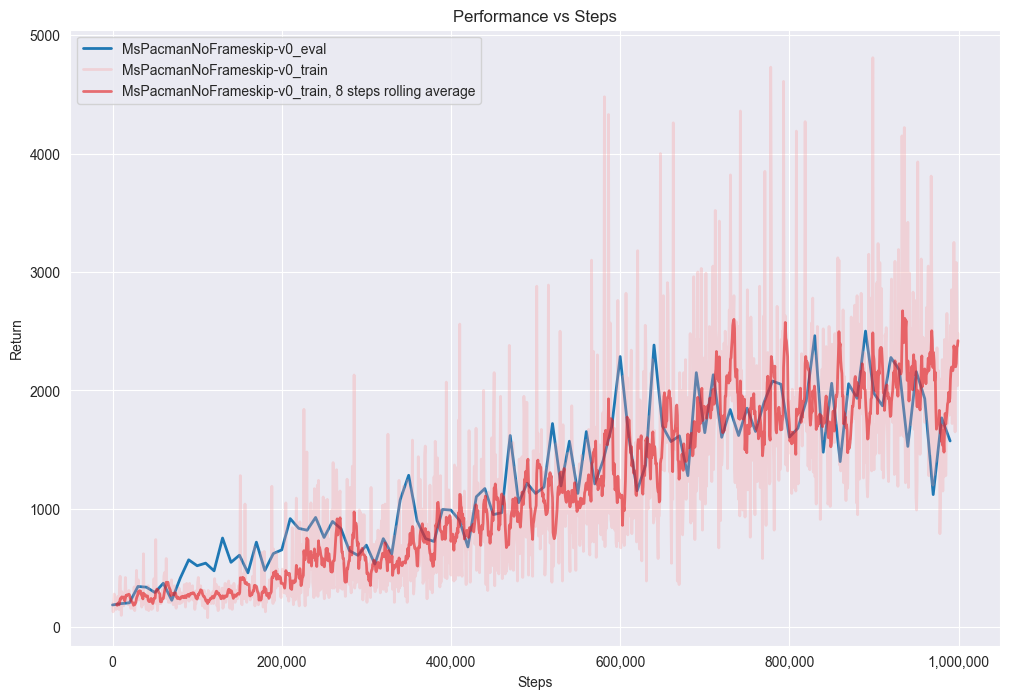

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 1
ax.plot(df_eval['steps'], df_eval['eval_return'], linewidth=2, color=palette[c_idx],
            label=f"{df_eval['name'][0]}")
c_idx += 3
ax.plot(df_train['steps'], df_train['train_return'], linewidth=2, color=palette[c_idx],
            label=f"{df_train['name'][0]}", alpha=0.3)
c_idx += 1
ax.plot(df_train['steps'], df_train['rolling_train_8'], linewidth=2, color=palette[c_idx],
            label=f"{df_train['name'][0]}, 8 steps rolling average", alpha=0.6)

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Return')
ax.set_title('Performance vs Steps')
ax.legend()

plt.savefig('plots/dqn_ms_pacman.png', dpi=200, pad_inches=0, bbox_inches='tight')

### Experimenting with Hyperparameters

In [35]:
# Path to your log directory
log_dirs = ['data/hw3_dqn_lunarlander_doubleq_ex1_LunarLander-v3_s32_l2_d0.99_doubleq_06-05-2025_15-36-16/',
            'data/hw3_dqn_lunarlander_doubleq_ex2_LunarLander-v3_s96_l2_d0.99_doubleq_06-05-2025_16-20-49/',
            'data/hw3_dqn_lunarlander_doubleq_ex3_LunarLander-v3_s164_l2_d0.99_doubleq_06-05-2025_16-26-35/',]
n_logs = len(log_dirs)
eval_period = 10_000

# Load the events file
names = ['Double DQN, size 32', 'Double DQN, size 96', 'Double DQN, size 164']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['rolling'] = df[scalar_tag].rolling(8).mean()
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    df['name'] = names[idx]
    dfs.append(df)

log_dirs_double = ['data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_04-05-2025_11-27-13/',
                'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_05-05-2025_15-24-53/',
                'data/hw3_dqn_dqn_LunarLander-v3_s64_l2_d0.99_doubleq_05-05-2025_15-35-25/']
n_logs = len(log_dirs_double)
eval_period = 10_000

# Load the events file
df_double = pd.DataFrame()
for idx, log_dir in enumerate(log_dirs_double):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df_double[f"Double DQN, seed {idx+1}"] = arr
        df_double['steps'] = np.arange(len(df_double[f"Double DQN, seed {idx+1}"])) * eval_period

df_double['average_eval'] = df_double.drop(columns=['steps']).mean(axis=1)
df_double['name'] = 'Double DQN, size 64 (default)'

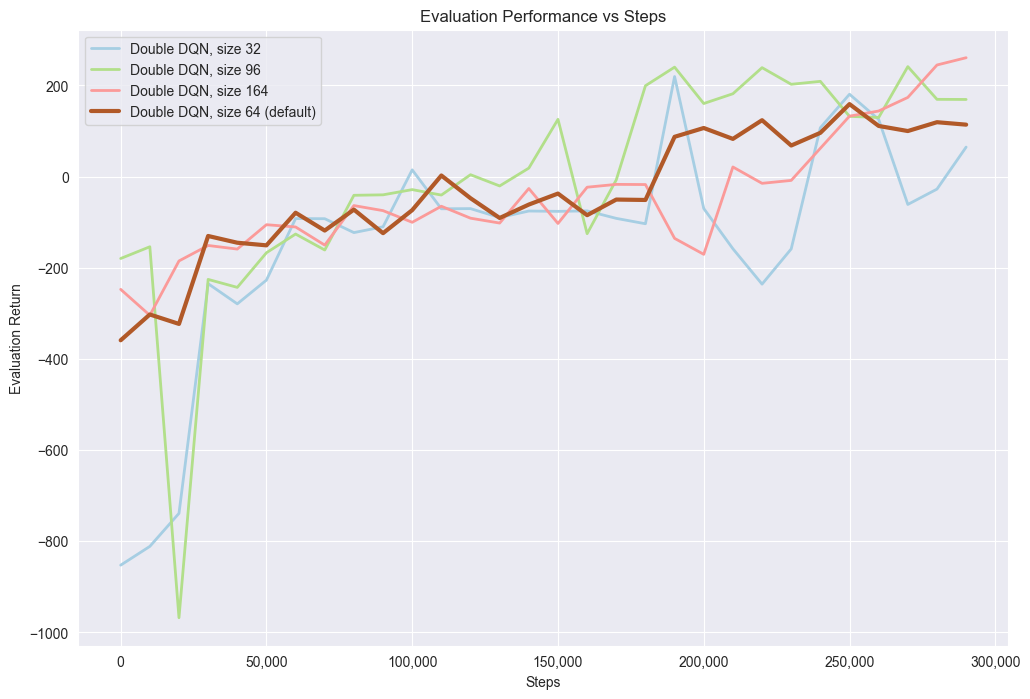

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=df['name'][0])
    c_idx += 2
    # ax.plot(df['steps'], df['rolling'], linewidth=2, color=palette[c_idx],
    #         label=f"{df['name'][0]}, rolling average")
ax.plot(df_double['steps'], df_double['average_eval'], linewidth=3, color=palette[c_idx+5],
            label=df_double['name'][0])

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/hyperparameter_tuning.png', dpi=200, pad_inches=0, bbox_inches='tight')

## Continuous Actions with Actor-Critic
### Actor with REINFORCE

In [26]:
# Path to your log directory
log_dirs = ['data/hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_05-05-2025_16-53-00/',
            'data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_06-05-2025_09-34-10/',]
n_logs = len(log_dirs)
eval_period = 10_000

# Load the events file
names = ['Reinforce1', 'Reinforce10']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['rolling'] = df[scalar_tag].rolling(8).mean()
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    df['name'] = names[idx]
    dfs.append(df)


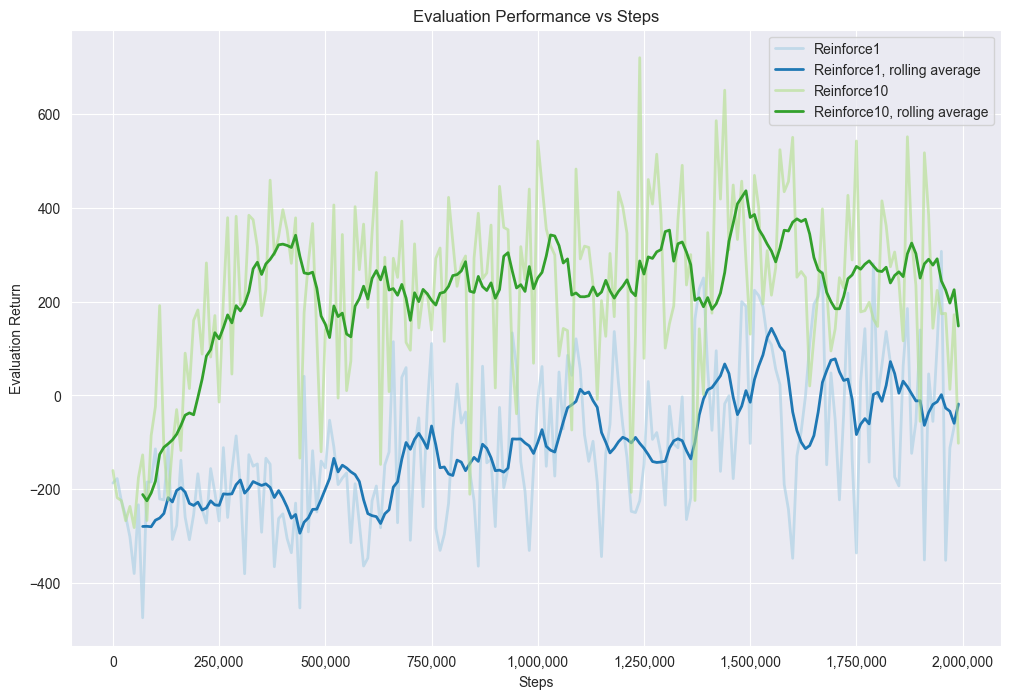

In [28]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=df['name'][0], alpha=0.6)
    c_idx += 1
    ax.plot(df['steps'], df['rolling'], linewidth=2, color=palette[c_idx],
            label=f"{df['name'][0]}, rolling average")
    c_idx += 1

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/reinforce1_reinfroce10.png', dpi=200, bbox_inches='tight')

### REPARAMETRIZE

In [4]:
# Path to your log directory
log_dirs = ['data/hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_05-05-2025_16-53-00/',
            'data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_06-05-2025_09-34-10/',
            'data/hw3_sac_reparametrize_HalfCheetah-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_stu0.005_06-05-2025_12-12-10/',]
n_logs = len(log_dirs)
eval_period = 10_000

# Load the events file
names = ['Reinforce1', 'Reinforce10', 'Reparametrize']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['rolling'] = df[scalar_tag].rolling(8).mean()
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    df['name'] = names[idx]
    dfs.append(df)


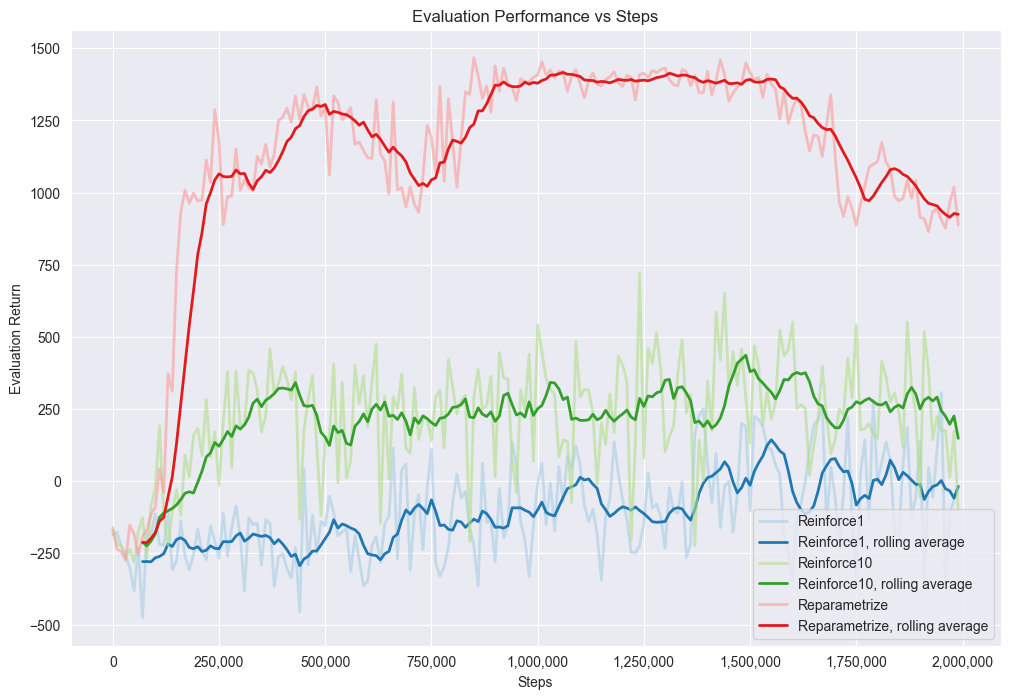

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=df['name'][0], alpha=0.6)
    c_idx += 1
    ax.plot(df['steps'], df['rolling'], linewidth=2, color=palette[c_idx],
            label=f"{df['name'][0]}, rolling average")
    c_idx += 1

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/reinforce1_reinfroce10_reparametrize.png', dpi=200, pad_inches=0, bbox_inches='tight')

## Stabilizing target values
### Hopper

In [54]:
# Path to your log directory
log_dirs = ['data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_07-05-2025_10-19-11/',
            'data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_07-05-2025_10-25-38/',
            'data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_07-05-2025_13-03-36/',]
n_logs = len(log_dirs)
eval_period = 5000

# Load the events file
names = ['Single critic', 'DoubleQ', 'ClipQ']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['steps'] = np.arange(len(df['eval_return'])) * eval_period
    df['name'] = names[idx]
    dfs.append(df)


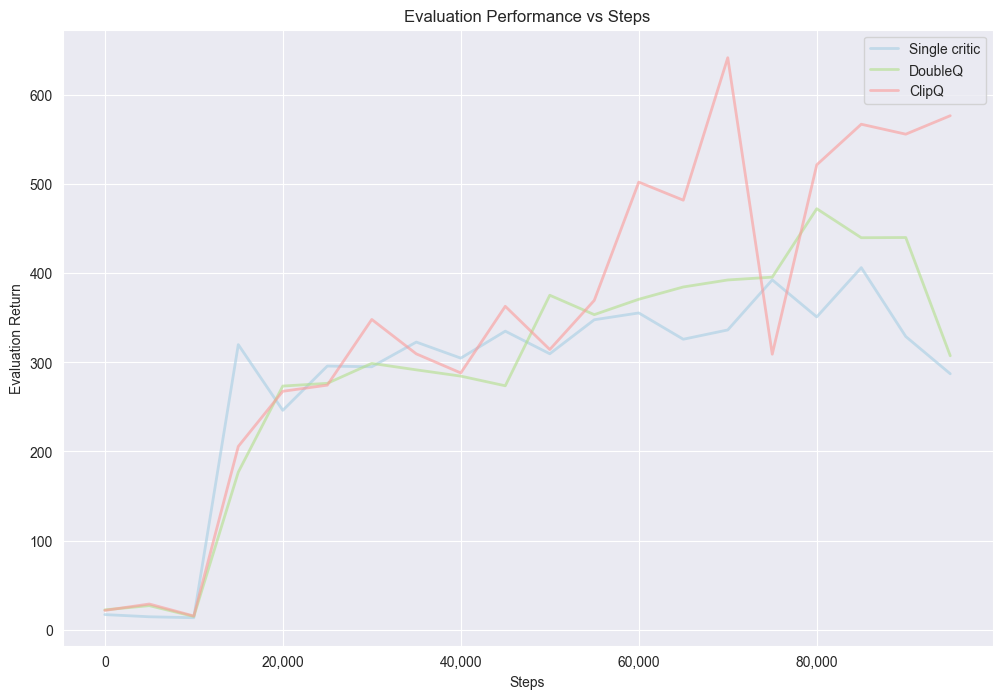

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['eval_return'], linewidth=2, color=palette[c_idx],
            label=df['name'][0], alpha=0.6)
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Evaluation Return')
ax.set_title('Evaluation Performance vs Steps')
ax.legend()

plt.savefig('plots/stabilizing_q_values_return.png', dpi=200, pad_inches=0, bbox_inches='tight')

In [56]:
# Path to your log directory
log_dirs = ['data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_07-05-2025_10-19-11/',
            'data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_07-05-2025_10-25-38/',
            'data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_07-05-2025_13-03-36/',]
n_logs = len(log_dirs)
eval_period = 1000

# Load the events file
names = ['Single critic', 'DoubleQ', 'ClipQ']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('q_values'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        df['steps'] = np.arange(len(df['q_values'])) * eval_period
    df['name'] = names[idx]
    dfs.append(df)


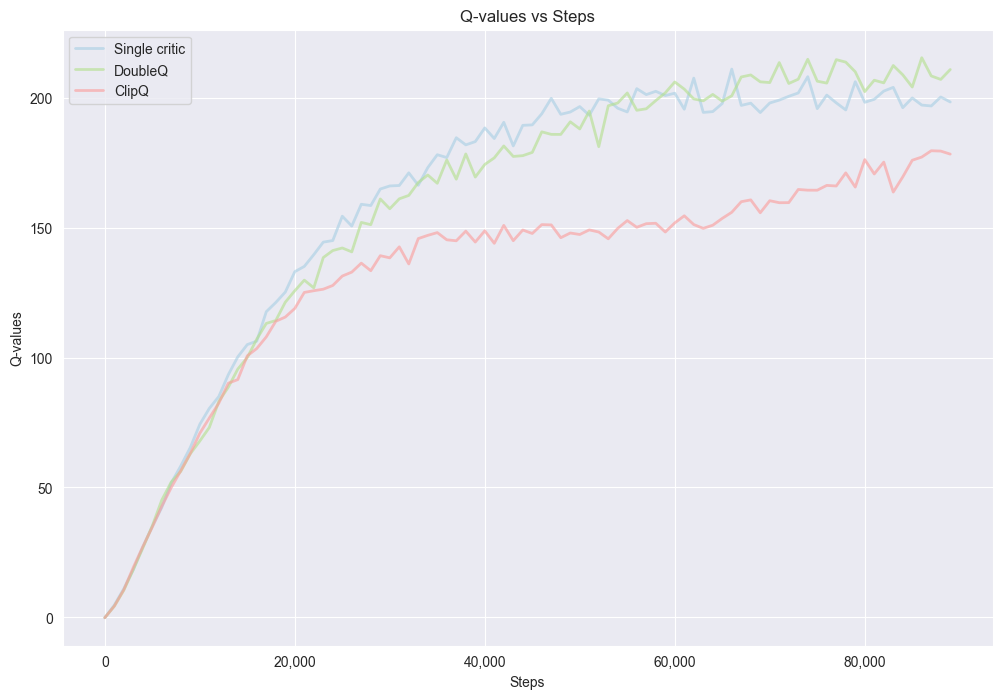

In [ ]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    ax.plot(df['steps'], df['q_values'], linewidth=2, color=palette[c_idx],
            label=df['name'][0], alpha=0.6)
    c_idx += 2

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Q-values')
ax.set_title('Q-values vs Steps')
ax.legend()

plt.savefig('plots/stabilizing_q_values_q_values.png', dpi=200, pad_inches=0, bbox_inches='tight')

### Humanoid

In [71]:
# Path to your log directory
log_dirs = ['../class_project2/data/q2_pg_humanoid_Humanoid-v4_17-04-2025_21-05-53/',
            'data/hw3_sac_sac_humanoid_Humanoid-v4_reparametrize_s256_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_06-05-2025_16-32-03/']
n_logs = len(log_dirs)
eval_period = 5000

# Load the events file
names = ['Policy gradient', 'SAC, clipQ, reparametrize']
dfs = []
for idx, log_dir in enumerate(log_dirs):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('eval_return', 'Eval_AverageReturn', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
        if scalar_tag == 'eval_return':
            df['steps'] = np.arange(len(df['eval_return'])) * eval_period
        if scalar_tag != 'Train_EnvstepsSoFar':
            df['rolling'] = df[scalar_tag].rolling(8).mean()
            
    df['name'] = names[idx]
    dfs.append(df)


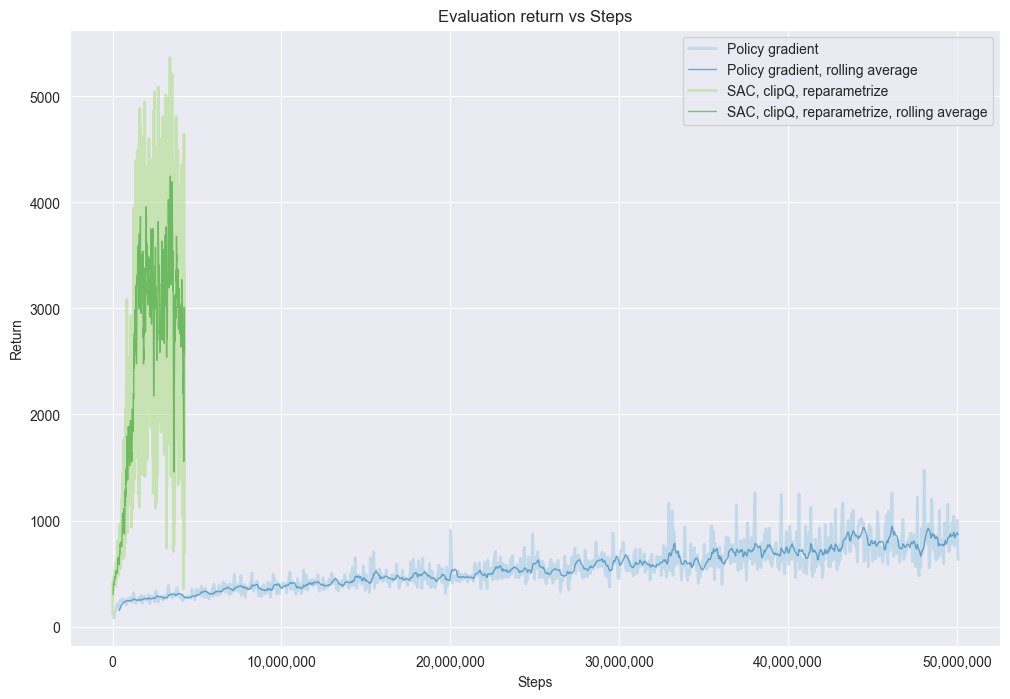

In [75]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Create x-axis values scaled by eval_period for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
ax.plot(dfs[0]['Train_EnvstepsSoFar'], dfs[0]['Eval_AverageReturn'], linewidth=2, color=palette[c_idx],
        label=dfs[0]['name'][0], alpha=0.6)
c_idx += 1
ax.plot(dfs[0]['Train_EnvstepsSoFar'], dfs[0]['rolling'], linewidth=1, color=palette[c_idx],
        label=f"{dfs[0]['name'][0]}, rolling average", alpha=0.6)

c_idx += 1
ax.plot(dfs[1]['steps'], dfs[1]['eval_return'], linewidth=2, color=palette[c_idx],
        label=dfs[1]['name'][0], alpha=0.6)
c_idx += 1
ax.plot(dfs[1]['steps'], dfs[1]['rolling'], linewidth=1, color=palette[c_idx],
        label=f"{dfs[1]['name'][0]}, rolling average", alpha=0.6)

ax.set_xlabel('Steps')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Return')
ax.set_title('Evaluation return vs Steps')
ax.legend()

plt.savefig('plots/humanoid.png', dpi=200, pad_inches=0, bbox_inches='tight')

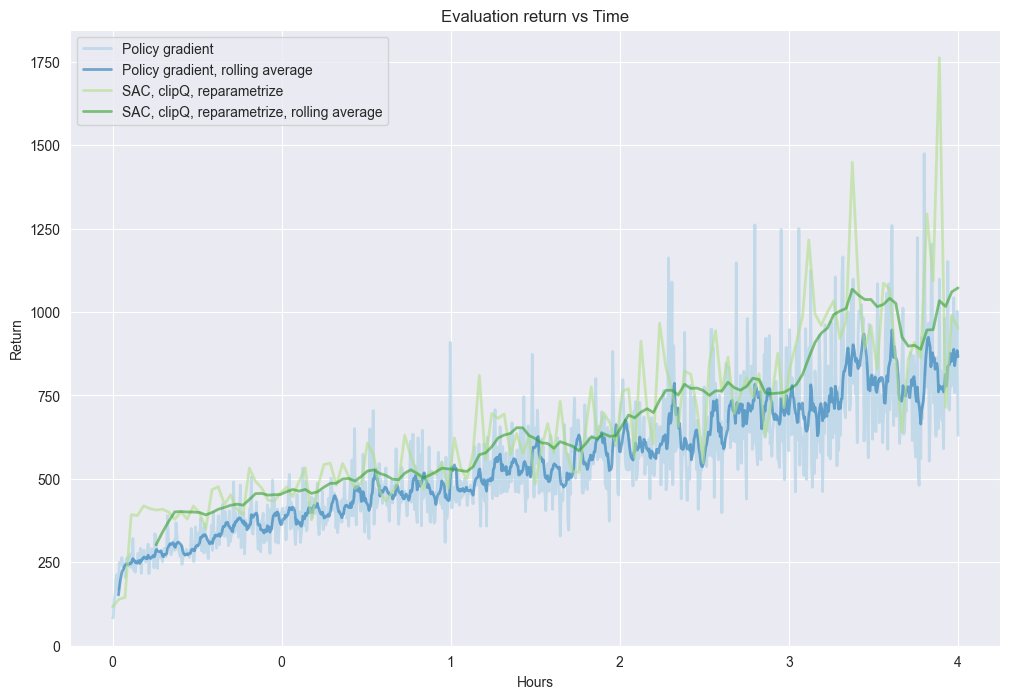

In [91]:
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)

# Filter df to only use first 1/6 of the data as you did before
df = dfs[1][dfs[1]['steps'] < dfs[1]['steps'].max() * (4/25)]

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0

# Get max length of each dataset for normalization
len_pg = len(dfs[0]['Eval_AverageReturn'])
len_sac = len(df['eval_return'])

# Create normalized x-axes (from 0 to 1)
x_pg = np.linspace(0, 1, len_pg)
x_sac = np.linspace(0, 1, len_sac)

# Plot Policy Gradient data with normalized x-axis
ax.plot(x_pg, dfs[0]['Eval_AverageReturn'], linewidth=2, color=palette[c_idx],
    label=dfs[0]['name'][0], alpha=0.6)
c_idx += 1
ax.plot(x_pg, dfs[0]['rolling'], linewidth=2, color=palette[c_idx],
    label=f"{dfs[0]['name'][0]}, rolling average", alpha=0.6)
c_idx += 1

# Plot SAC data with normalized x-axis
ax.plot(x_sac, df['eval_return'], linewidth=2, color=palette[c_idx],
    label=dfs[1]['name'][0], alpha=0.6)
c_idx += 1
ax.plot(x_sac, df['rolling'], linewidth=2, color=palette[c_idx],
    label=f"{dfs[1]['name'][0]}, rolling average", alpha=0.6)

# Set custom x-ticks to show steps
# We'll create x-ticks that represent the steps
xticks = np.linspace(0, 1, 6)  # 6 ticks from 0 to 1
xtick_labels = [f"{int(x*4):,}" for x in xticks]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Hours')
ax.set_ylabel('Return')
ax.set_title('Evaluation return vs Time')
ax.legend()

plt.savefig('plots/humanoid_sac_cropped.png', dpi=200, pad_inches=0, bbox_inches='tight')